# 1. Variant to solve this task (Compare product sales)

## SQL code to get this df:

SELECT Product.product_id, Product.name, SUM(OrderItems.amount_total) as total_sales, Orders.date
FROM sales.OrderItems
JOIN sales.Orders ON OrderItems.order_id = Orders.id
JOIN sales.Product ON OrderItems.product_id = Product.product_id
JOIN sales.Customer ON Orders.customer = Customer.id
JOIN sales.Country ON Customer.country_id = Country.id
WHERE Orders.date BETWEEN '2018-01-01' AND '2019-12-31'
GROUP BY Product.product_id, Country.region, Product.name, Orders.date
ORDER BY total_sales DESC;


In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('result_task2.csv', sep = ',')

In [6]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

yearly_sales = df.groupby(['year', 'product_id'])['total_sales'].sum()

yearly_growth = yearly_sales.pct_change()

sorted_products = yearly_growth.sort_values(ascending=False)

top_products = sorted_products.head(5)

bottom_products = sorted_products.tail(5)


In [10]:
print(top_products)

year  product_id
2018  YT            2.566271
2019  YT            2.562706
      II            1.521182
2018  II            1.483106
2019  RM            0.427951
Name: total_sales, dtype: float64


In [11]:
print(bottom_products)

year  product_id
2018  DB           -0.691289
2019  DB           -0.694503
2018  RD           -0.717508
2019  RD           -0.720877
2018  ALL                NaN
Name: total_sales, dtype: float64


# 2. Variant to solve this task (Analyze Customer Type)

## SQL code:

SELECT Customer.type_id, SUM(OrderItems.amount_total) as total_sales, Orders.date
FROM sales.OrderItems
JOIN sales.Orders ON OrderItems.order_id = Orders.id
JOIN sales.Customer ON Orders.customer = Customer.id
JOIN sales.Country ON Customer.country_id = Country.id
WHERE Orders.date BETWEEN '2018-01-01' AND '2019-12-31'
GROUP BY Customer.type_id, Country.region, Orders.date
ORDER BY total_sales DESC;

In [15]:
df2 = pd.read_csv('result2_task2.csv', sep = ',')

In [17]:
df2['date'] = pd.to_datetime(df['date'])
df2['year'] = df2['date'].dt.year

total_sales_per_type_and_year = df2.groupby(['type_id', 'year'])['total_sales'].sum().reset_index()

pivot_df = total_sales_per_type_and_year.pivot(index='type_id', columns='year', values='total_sales')

pivot_df['sales_change'] = (pivot_df[2019] - pivot_df[2018]) / pivot_df[2018] * 100

sorted_df = pivot_df.sort_values(by='sales_change')


In [19]:
sorted_df

year,2018,2019,sales_change
type_id,,,
1,84569745,35219649,-58.354316
2,81702701,38253732,-53.179354
3,81375975,40358562,-50.404819


# 3. Variant to solve this task (Look at the Timing of Sales (monthly))

## SQL code:

SELECT Country.region, COUNT(*) as total_sales, MONTH(Orders.date) as month
FROM sales.Orders
JOIN sales.Customer ON Orders.customer = Customer.id
JOIN sales.Country ON Customer.country_id = Country.id
group by Country.region, Orders.date

In [22]:
df3 = pd.read_csv('restult3_task2.csv', sep = ',')

<AxesSubplot:xlabel='month'>

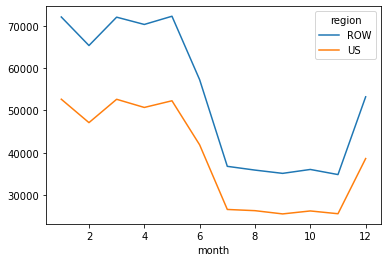

In [24]:
df3['month'] = df3['month'].astype(int)

total_sales_per_region_and_month = df3.groupby(['region', 'month'])['total_sales'].sum().reset_index()

pivot_df = total_sales_per_region_and_month.pivot(index='month', columns='region', values='total_sales')

pivot_df.plot()


In [25]:
pivot_df

region,ROW,US
month,,
1,72107,52647
2,65351,47107
3,72062,52631
4,70338,50699
5,72280,52278
6,57259,41852
7,36765,26561
8,35875,26275
9,35101,25506


# 4. Variant to solve this task (Consider Exchange Rates)

## SQL code:

SELECT Country.currency, AVG(ExchangeRate.rate) as avg_rate, Orders.date
FROM sales.Orders
JOIN sales.Customer ON Orders.customer = Customer.id
JOIN sales.Country ON Customer.country_id = Country.id
JOIN sales.ExchangeRate ON Country.currency = ExchangeRate.currency
WHERE Orders.date BETWEEN '2018-01-01' AND '2019-12-31'
GROUP BY Country.currency, Orders.date;


In [26]:
df4 = pd.read_csv('result4_task2.csv', sep = ',')

<AxesSubplot:xlabel='date'>

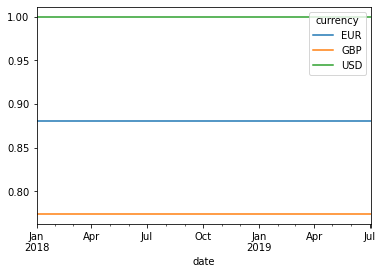

In [27]:
df4['date'] = pd.to_datetime(df4['date'])

pivot_df = df4.pivot(index='date', columns='currency', values='avg_rate')

pivot_df.plot()


In [28]:
pivot_df

currency,EUR,GBP,USD
date,,,
2018-01-01,0.880398,0.77357,1.0
2018-01-02,0.880398,0.77357,1.0
2018-01-03,0.880398,0.77357,1.0
2018-01-04,0.880398,0.77357,1.0
2018-01-05,0.880398,0.77357,1.0
...,...,...,...
2019-06-30,0.880398,0.77357,1.0
2019-07-01,0.880398,0.77357,1.0
2019-07-02,0.880398,0.77357,1.0


# Source of issue and actions:



### **Customer Type Decline:** The most significant finding is the substantial decline in sales for customer type 1 and 2, with type 1 experiencing the greatest decrease. This should be the main focus of further investigation. Understanding why this particular group's sales have fallen could shed light on the overall decline in the ROW region.

#### **Action:** Dive deeper into the characteristics of this customer type. What industries are they in? What products do they typically buy? Have there been any changes in the market that could be impacting these customers more than others? Consider running surveys or interviews with these customers to gain further insights.

### **Seasonality:** Both US and ROW show a significant drop in sales from July to November. This indicates that the problem might not be specific to the ROW region and could be a seasonal effect impacting the entire business.

#### **Action:** Examine previous years' data to see if this is a consistent seasonal pattern. If it is, consider strategies to mitigate this, such as seasonal promotions or marketing campaigns.

### **Product Sales:** There is a fluctuation in the total sales of different products across different dates. This indicates that some products might be performing better than others.

#### **Action:** Investigate the product mix sold in 2018 and 2019. Have there been changes in the popularity of certain products? Has there been a change in competition, customer preferences, or product quality?

### **Exchange Rates:** The exchange rates seem to be stable, so they are unlikely to be a factor in the sales decline.